## Binary Classification

In [1]:
import edamame
import edamame.eda as eda
from edamame.classifier import TrainClassifier, classifier_metrics, ClassifierDiagnose
import pandas as pd
import numpy as np
from sklearn import datasets
print(edamame.__version__)

0.59


### Dataset

In [3]:
cancer = datasets.load_breast_cancer()
X = cancer.data
print(X.shape, type(X))
y = cancer.target
print(y.shape, type(y))

(569, 30) <class 'numpy.ndarray'>
(569,) <class 'numpy.ndarray'>


In [6]:
X = pd.DataFrame(X, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = pd.Series(y)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
X_train, y_train, X_test, y_test = eda.setup(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [11]:
X_train_s = eda.scaling(X_train)
X_test_s = eda.scaling(X_test)
print(X_train_s.shape)
print(X_test_s.shape)

(426, 30)
(143, 30)


In [12]:
classifier = TrainClassifier(X_train_s, y_train, X_test_s, y_test)
svm = classifier.svm()
rf = classifier.random_forest()
xgb = classifier.xgboost()
nb = classifier.gaussian_nb()

### gaussian_nb model metrics:

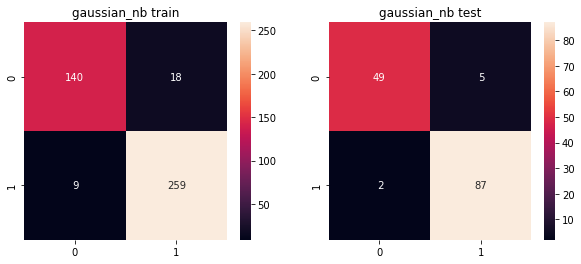

#### Train classification report

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       158
           1       0.94      0.97      0.95       268

    accuracy                           0.94       426
   macro avg       0.94      0.93      0.93       426
weighted avg       0.94      0.94      0.94       426



#### Test classification report

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.95      0.98      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [14]:
classifier.model_metrics(model_name="gaussian_nb", cm=True)

In [15]:
classifier.save_model(model_name="gaussian_nb")

In [16]:
nb_upload = eda.load_model(path='gaussian_nb.pkl')

In [17]:
classifier_metrics(nb_upload, X=X_train_s, y=y_train, cm=False)

#### Model metrics:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       158
           1       0.94      0.97      0.95       268

    accuracy                           0.94       426
   macro avg       0.94      0.93      0.93       426
weighted avg       0.94      0.94      0.94       426



### Diagnose

In [18]:
classifier_diagnose = ClassifierDiagnose(X_train=X_train_s, y_train=y_train, X_test=X_test_s, y_test=y_test)

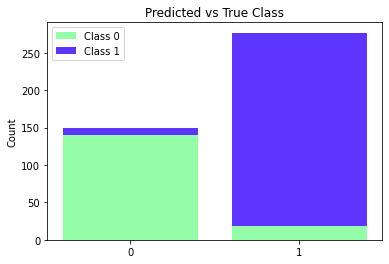

In [23]:
classifier_diagnose.class_prediction_error(model=nb, figsize=(6,4))

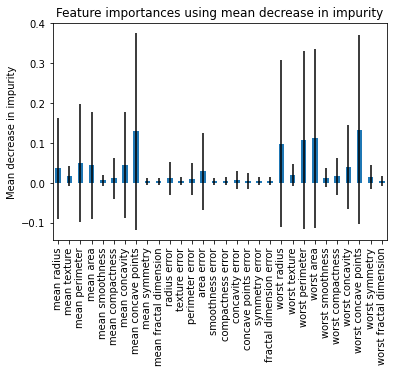

In [24]:
classifier_diagnose.random_forest_fi(model=rf, figsize=(6,4))

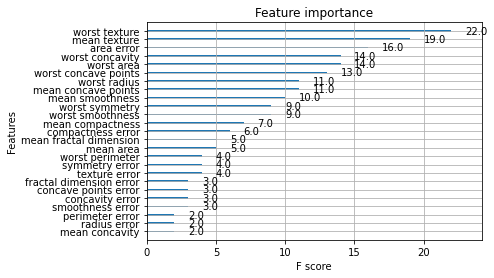

In [25]:
classifier_diagnose.xgboost_fi(model=xgb, figsize=(6,4))

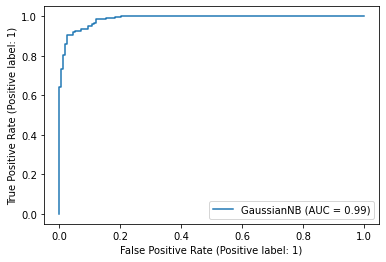

In [26]:
classifier_diagnose.plot_roc_auc(model=nb, figsize=(6,4))